In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

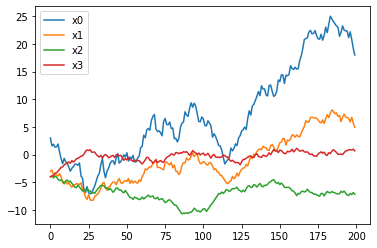

,x0,x1,x2,x3
x0,1.000000,0.993202,-0.056126,0.460917
x1,0.993202,1.000000,-0.053251,0.458618
x2,-0.056126,-0.053251,1.000000,-0.324967
x3,0.460917,0.458618,-0.324967,1.000000


In [14]:
np.random.seed(1337)

STREAM_LENGTH = 200
N = 4
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df.corr()

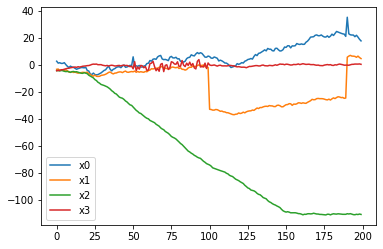

,x0,x1,x2,x3
0,3.000000,-3.000000,-4.000000,-4.000000
1,1.572558,-2.796408,-3.837190,-3.867646
2,1.873181,-3.736824,-4.210519,-3.813804
3,1.361140,-3.546805,-3.861269,-3.331156
4,1.408475,-3.665022,-4.050450,-3.296588
...,...,...,...,...
195,21.123842,6.553748,-110.564472,0.883275
196,22.186630,5.888479,-110.231556,0.876228
197,20.816212,6.757978,-110.413616,0.856251
198,19.224018,5.723776,-110.046544,0.972684


In [15]:
df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)]}],
                      'shift':   [{'n': 1, 'timestamps': [(100,190)]}],
                      'trend':   [{'n': 2, 'timestamps': [(20, 150)]}],
                      'variance':[{'n': 3, 'timestamps': [(50, 100)]}]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()
df